# Feature Scaling:

`feature scaling` refers to the process of transforming the values of different features in a dataset so that they all fall within a similar range

![Feature scaling img.png](images/Feature%20scaling%20img.png)

In [111]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
# load dataset
df = pd.read_csv('Datasets/1. Data_for_Standardization.csv')

In [113]:
# View sample data
df.sample(5)

,price,area,Purchased
519,2450000,4840,1
66,6930000,13200,0
93,6300000,7200,0
149,5600000,6600,1
442,3220000,2684,0


## Train test split

In [115]:
# It is recommended to do train_test_split before feature scaling:
# This is because feature scaling is done on the training data, and then the scaled data is used
# to train the model and make predictions on the test data.

from sklearn.model_selection import train_test_split
x = df.drop('Purchased', axis=1)
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((381, 2), (164, 2))

In [116]:
y_test

239    0
113    0
325    0
66     0
479    0
      ..
477    1
505    0
347    0
224    0
38     0
Name: Purchased, Length: 164, dtype: int64

# Standardization

`standardization` refers to a feature scaling technique where features are scaled to have a mean of 0 and a standard deviation of 1, essentially putting all features on the same scale, which is particularly useful when working with algorithms sensitive to feature magnitudes.

It is also known as Z-score normalization or mean centering technique.

![standardization visual image](images/standardization%20visual.png)

![Standardization formula image.png](images/standardization%20formula.jpg)

In [117]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# fitting scaler
ss.fit(X_train) # calculates mean and standard deviation

# transforming
X_train_s = ss.transform(X_train)
X_test_s = ss.transform(X_test)

In [118]:
X_train

,price,area
454,3143000,4500
392,3500000,3990
231,4690000,4320
271,4340000,1905
250,4515000,3510
...,...,...
70,6790000,4000
277,4305000,10360
9,9800000,5750
359,3710000,3600


In [119]:
X_train_s

array([[-8.68393662e-01, -2.86365885e-01],
       [-6.77628255e-01, -5.44761817e-01],
       [-4.17435668e-02, -3.77564449e-01],
       [-2.28768475e-01, -1.60114518e+00],
       [-1.35256021e-01, -7.87957988e-01],
       [-1.60358858e+00, -1.35034913e+00],
       [-9.02058145e-01, -5.33028878e-02],
       [ 6.31546103e-01,  7.39617961e-01],
       [ 4.07116213e-01, -7.17025771e-01],
       [-8.64653164e-01,  8.53616167e-01],
       [ 1.30483577e+00,  4.73622149e-01],
       [-1.05167807e+00, -5.59961577e-01],
       [-9.20760636e-01, -6.41026968e-01],
       [-1.03297558e+00, -3.62364688e-01],
       [-1.57534782e+00, -1.04635392e+00],
       [-6.96330746e-01,  1.29094240e-01],
       [-3.03578439e-01,  3.97623346e-01],
       [ 1.45281342e-01,  1.28427605e+00],
       [ 1.37964574e+00,  4.73622149e-01],
       [ 2.57496287e-01,  2.63654810e+00],
       [-4.17435668e-02,  1.69626936e-01],
       [ 7.04713782e-02, -4.78896187e-01],
       [ 3.88413722e-01,  1.47680635e+00],
       [-1.

In [120]:
print(ss.mean_) # calculated mean

[4768119.26509186    5065.20472441]


In [121]:
# StandardScaler object transform function returns the numpy array..
# ...which is to be converted into DataFrame.

X_train_s = pd.DataFrame(X_train_s, columns=X_train.columns)
X_test_s = pd.DataFrame(X_test_s, columns=X_test.columns)

In [122]:
np.round(X_train.describe(),1) # before scaling stats

,price,area
count,381.0,381.0
mean,4768119.3,5065.2
std,1873869.2,1976.3
min,1750000.0,1836.0
25%,3430000.0,3630.0
50%,4382000.0,4560.0
75%,5740000.0,6360.0
max,13300000.0,15600.0


In [123]:
np.round(X_train_s.describe(), 1) # After scaling stats

,price,area
count,381.0,381.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.6,-1.6
25%,-0.7,-0.7
50%,-0.2,-0.3
75%,0.5,0.7
max,4.6,5.3


# Effect of Scaling

In [124]:
X_train

,price,area
454,3143000,4500
392,3500000,3990
231,4690000,4320
271,4340000,1905
250,4515000,3510
...,...,...
70,6790000,4000
277,4305000,10360
9,9800000,5750
359,3710000,3600


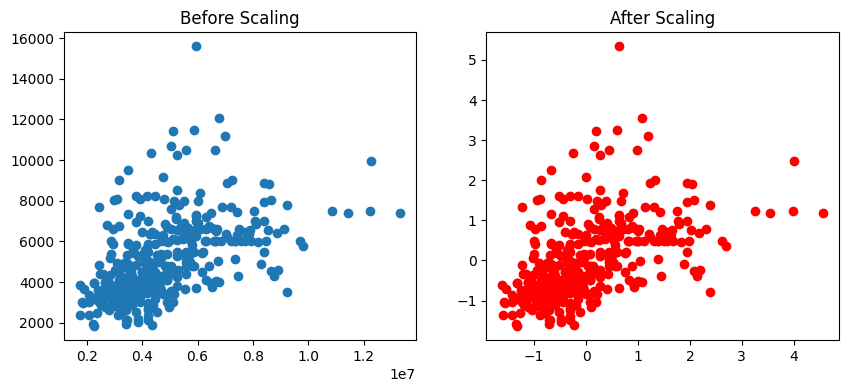

In [143]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

ax1.scatter(X_train['price'], X_train['area'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_s['price'], X_train_s['area'],color='red')
ax2.set_title("After Scaling")
plt.show()

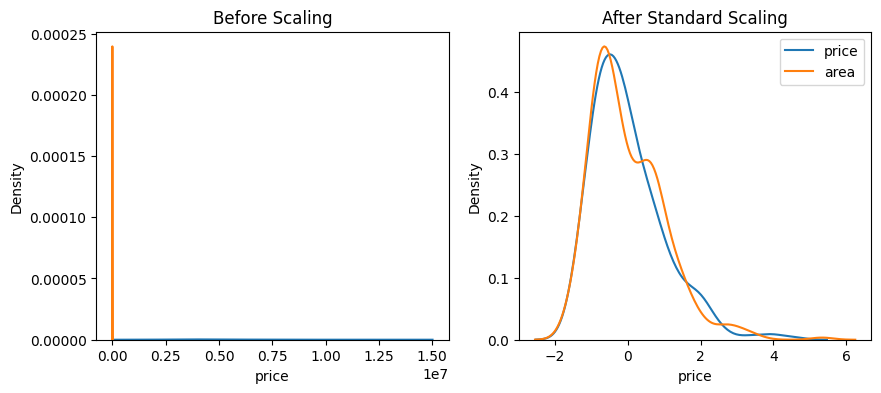

In [144]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['price'],label='price', ax=ax1)
sns.kdeplot(X_train['area'],label='area', ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_s['price'],label='price', ax=ax2)
sns.kdeplot(X_train_s['area'], label='area',ax=ax2)
plt.legend()
plt.show()

# Comparison of Distributions

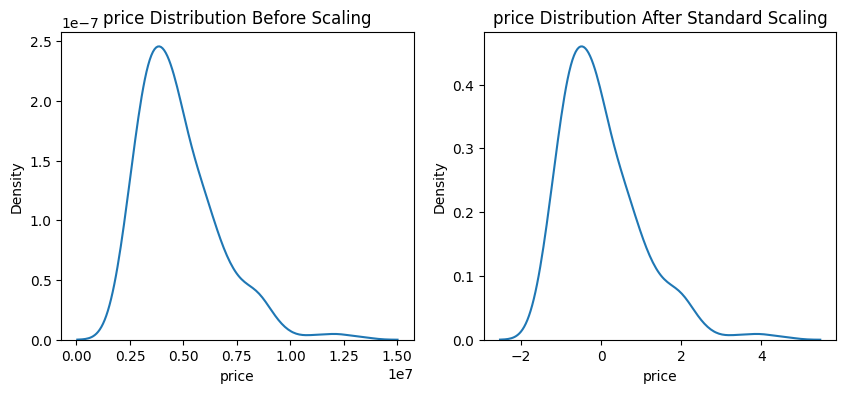

In [145]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

# before scaling
ax1.set_title('price Distribution Before Scaling')
sns.kdeplot(X_train['price'], ax=ax1)

# after scaling
ax2.set_title('price Distribution After Standard Scaling')
sns.kdeplot(X_train_s['price'], ax=ax2)
plt.show()

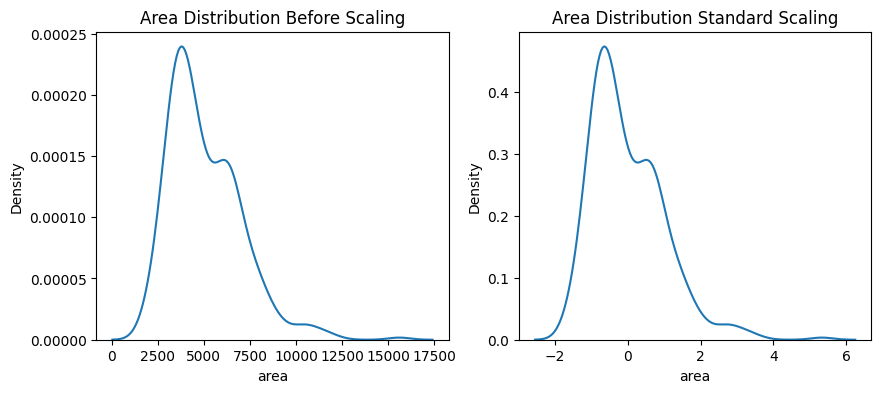

In [146]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

# before scaling
ax1.set_title('Area Distribution Before Scaling')
sns.kdeplot(X_train['area'], ax=ax1)

# after scaling
ax2.set_title('Area Distribution Standard Scaling')
sns.kdeplot(X_train_s['area'], ax=ax2)
plt.show()

# Why scaling is important?

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
lr = LogisticRegression()
lr_s = LogisticRegression()

In [131]:
lr.fit(X_train,y_train)
lr_s.fit(X_train_s,y_train)

LogisticRegression()

In [132]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_s.predict(X_test_s)

In [133]:
from sklearn.metrics import accuracy_score

In [134]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6890243902439024
Scaled 0.7317073170731707


### Use standardization when:

✔ Features have different scales or units (e.g., height in cm, weight in kg).    
✔ The algorithm is sensitive to feature magnitudes (distance-based models).    
✔ Data follows a normal (Gaussian) distribution or is approximately symmetric.    
✔ You want to speed up gradient-based optimization (e.g., in neural networks).    

# Effect of Outlier

In [135]:
outlier_df = pd.DataFrame({'price':[500,9870,995],'area':[441000,250000,350000],'Purchased':[0,1,1]})

In [136]:
new_df = pd.concat([df,outlier_df],ignore_index=True)

In [137]:
new_df

,price,area,Purchased
0,13300000,7420,0
1,12250000,8960,0
2,12250000,9960,0
3,12215000,7500,0
4,11410000,7420,1
...,...,...,...
543,1750000,2910,1
544,1750000,3850,1
545,500,441000,0
546,9870,250000,1


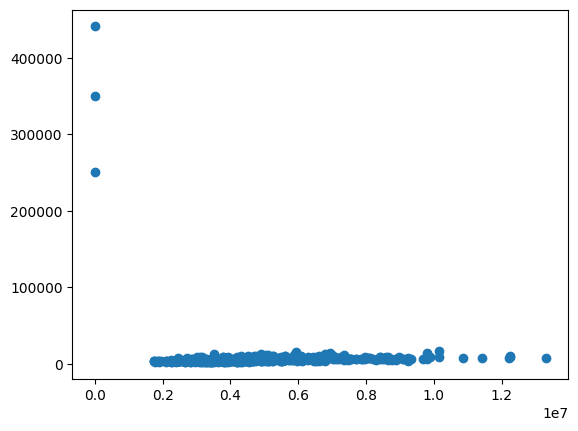

In [138]:
plt.scatter(new_df['price'], new_df['area'])

In [139]:
from sklearn.model_selection import train_test_split
new_x = new_df.drop('Purchased', axis=1)
new_y = new_df['Purchased']
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_x,new_y,test_size=0.3,random_state=0)

new_X_train.shape, new_X_test.shape

((383, 2), (165, 2))

In [140]:
from sklearn.preprocessing import StandardScaler

new_ss = StandardScaler()

# fit the ss to the train set, it will learn the parameters
new_ss.fit(new_X_train)

# transform train and test sets
new_X_train_s = new_ss.transform(new_X_train)
new_X_test_s = new_ss.transform(new_X_test)

In [141]:
new_X_train_s = pd.DataFrame(new_X_train_s, columns=X_train.columns)
new_X_test_s = pd.DataFrame(new_X_test_s, columns=X_test.columns)

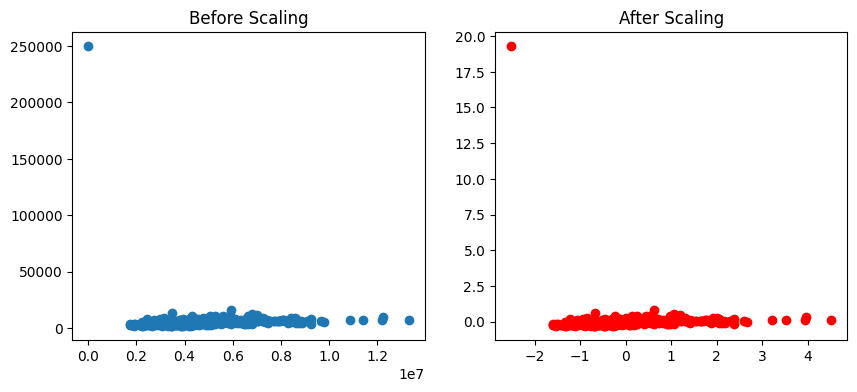

In [147]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

ax1.scatter(new_X_train['price'], new_X_train['area'])
ax1.set_title("Before Scaling")
ax2.scatter(new_X_train_s['price'], new_X_train_s['area'],color='red')
ax2.set_title("After Scaling")
plt.show()

## ML algo wants standardization:

![which algo wants std image.png](images/which%20algo%20wants%20std.png)

## Summary:

✔ Definition: Standardization transforms features to have zero mean and unit variance using the formula:     
     
✔ Purpose: Removes unit dependency and ensures features have the same scale for better model performance.     
     
✔ When to Use?     
     
- When features have different scales or units (e.g., age in years, income in dollars).     
- When using distance-based algorithms (KNN, SVM, PCA, K-Means).     
- When applying gradient descent optimization (Logistic Regression, Neural Networks).     

✔ Not Needed For:          
- Tree-based models (Decision Trees, Random Forest, XGBoost) since they are scale-invariant.     